In [1]:
# Name : Janmejay Mohanty
# Cite: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

In [2]:
# Importing python libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
Column_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
lda_data = pd.read_table("iris.data", delimiter=',', names = Column_names)

In [4]:
lda_data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = lda_data.iloc[:, 0:4].values
y = lda_data.iloc[:, 4].values

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

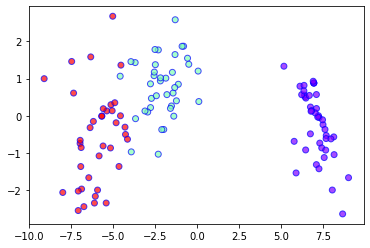

In [8]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',alpha=0.7,edgecolors='b')

In [9]:
RFC = RandomForestClassifier(max_depth=2, random_state=0)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

In [10]:
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)*100))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 86.66666666666667
[[ 7  0  0]
 [ 0 11  0]
 [ 0  4  8]]
